# CPIT 440 lab manual - Lab 5  & Lab 6
 
   ## Objectives
   
   These labs aim to practice the preprocessing steps to prepare the data to build the model. These steps will be as follwoing:  
   1. Splitting into train and test sets
   2. Divide the dataset into Dependent & Independent variable
   3. Data cleaning (missing values)
   4. Handling the categorical attributes
   5. Handling outliers
   6. Data transformation and scaling  
   

-------------------------------------------

In [1]:
import pandas as pd
#url="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
url="/Users/nooralsharif/CPIT-440 LAB/LAB work/housing.csv"
housing=pd.read_csv(url)

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Note: you can find the book and all its materials (dataset and the notebooks) in this link: https://github.com/ageron/handson-ml

**Duplication:**

Sometimes we find duplicates in our dataset which cause problems in the analysis. We need to remove the redundant rows.  
  
To print the duplicated rows in the dataset (this code only checks for duplicates but does not remove them):

In [3]:
housing.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [4]:
dup_rows = housing[housing.duplicated(subset=None, keep='first')]
dup_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


Based on the above result, housing dataset has no duplicates.  
  
The following code can be used to find and drop all the duplicated rows in any dataset.

```python
housing.drop_duplicates(subset=None, keep='first',inplace=True)
```

# 1. Sampling and Splitting into train and test sets

The train-test split is a technique for evaluating the performance of a machine learning algorithm. It can be used for classification or regression problems and can be used for any supervised learning algorithm.  
The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.  
The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.  
The train-test procedure is appropriate when there is a sufficiently large dataset available that has suitable representation of the problem. A suitable representation of the problem domain means that there are enough records to cover all common cases and most uncommon cases in the domain. If you have insufficient data, then a suitable alternate model evaluation procedure would be the k-fold cross-validation procedure.   
  
Creating a test set is theoretically simple: just pick some instances **randomly**, typically 20% of the dataset, and set them aside. This is done to ensure that datasets are a representative sample (e.g. random sample) of the original dataset. We will need to set a variable called `random_state` to an integer value. Why? When comparing machine learning algorithms, it is desirable (perhaps required) that they are fit and evaluated on the same subsets of the dataset. This can be achieved by fixing the seed for the pseudo-random number generator used when splitting the dataset. This can be achieved by setting the `random_state` to an integer value. Any value will do; it is not a tunable hyperparameter. Moreover, when we repeat the run it is important that our random numbers generator, generates the same numbers for the test set to prevent our model from seeing all the dataset. This problem can be solved using the `random_state`.



In [5]:
from sklearn.model_selection import train_test_split

train_set1, test_set1 = train_test_split(housing, test_size=0.2, random_state=42)

In [6]:
train_set1.shape

(16512, 10)

In [7]:
test_set1.shape

(4128, 10)

In [8]:
housing.shape

(20640, 10)

In the above method we used the **random sampling**. This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant sampling bias. The test set should be a representative of the whole population. Sometimes, our data is skewed and we need to use **Stratified sampling** to take the same proportion from each part of the dataset.

The method `train_test_split` can be used to stratify by categorical variable. 

Suppose you chatted with experts who told you that the `median_income` is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, you first need to create an income category attribute. Looking at the median income histogram more closely, most median income values are clustered around 2 to 5 (20,000–50,000) It is important to have a sufficient number of instances in your dataset for each stratum.




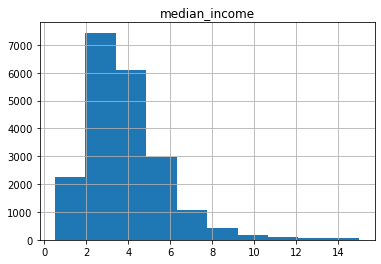

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(column='median_income', bins=10)
plt.show()

The following code creates an income category attribute by multiplying the median income by (2/3) (to limit the number of income categories), and rounding up using ceil (to have discrete categories), and then keeping only the categories lower than 5 and merging the other categories into category 5:

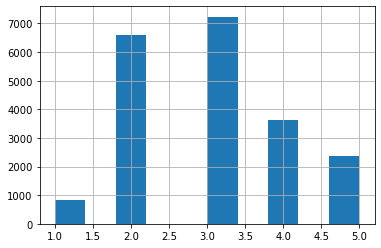

In [10]:
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"]*(2/3))
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist()
plt.show()

Now we are ready to apply the stratification.

In [11]:
train_set2, test_set2 = train_test_split(housing, test_size=0.2, random_state=42,stratify=housing['income_cat'])

In [12]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [13]:
train_set2["income_cat"].value_counts()/len(train_set2)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [14]:
test_set2["income_cat"].value_counts()/len(test_set2)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

Now you should remove the income_cat attribute so the data is back to its original state:

In [15]:
train_set2=train_set2.drop("income_cat", axis=1)
test_set2=test_set2.drop("income_cat", axis=1)


Note in the following cell that the index of the rows is shuffled during the sampling process. 

In [16]:
train_set2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


We can reset the index to start from 0.

In [17]:
train_set2.reset_index(drop=True, inplace=True)
test_set2.reset_index(drop=True, inplace=True)

-------------------

# 2. Divide the dataset into Dependent & Independent variable

The next step would be to identify the independent variable (X or predictors) and the dependent variable (y, labels, or target). Assume that we want predict the house prices.

In [18]:
train_X = train_set2.drop("median_house_value", axis=1)
train_y = train_set2["median_house_value"].copy()
test_X = test_set2.drop("median_house_value", axis=1)
test_y = test_set2["median_house_value"].copy()


--------------------

# 3. Data cleaning

The operations that are implemented in cleaning section and all the follwoing sections (section 4, 5, and 6) should be applied on both the train and the test sets. These steps are implemented after the spliting because we dont want to have any leakage from the test set to the train set when we calculate some central tendency measures. Data leakage happens when we create our model using information from outside the training dataset. This can produce optimistic and overfitted model that can fail to predict the unseen samples. Hence, the first step in the preprocessing should be splitting the data into train and test sets.   
To read more about data leakage: https://machinelearningmastery.com/data-leakage-machine-learning/ 
  
In the following cells I will apply the cleaning on the train set. The same steps should be repeated on the test set.  


In [19]:
housing=train_X

### Missing values

Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. You noticed earlier that the total_bedrooms attribute has some missing values, so let’s fix this.  
You have three options:  
* option 1: Get rid of the corresponding districts.
* option 2: Get rid of the whole attribute.
* option 3: Set the values to some value (zero, the mean, the median, etc.).  


First we will check for the null values: 

In [20]:
#The following two commnads show the missing values
housing.info()
housing.isnull().sum(axis=0)  # sum of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

To handle the missing values:

```python
# option 1
housing.dropna(subset=["total_bedrooms"],inplace=True) 
# option 2
housing.drop("total_bedrooms", axis=1,inplace=True) 
# option 3
median = housing["total_bedrooms"].median() 
housing["total_bedrooms"].fillna(median, inplace=True)
```

**Practice**  
The median cannot be calculated for the categorical attributes. If we have missing values in the attribute `ocean_proximity`, what is the suitable central tendency measure to use? Can you change the code in `# option 3` so it can handle categorical attribute? 

An alternative method to fill the missing values is to use a class in Scikit-Learn to take care of missing values: `SimpleImputer`. First, you need to create a `SimpleImputer` instance, specifying that you want to replace each attribute’s missing values with the median of that attribute. 

In [21]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan,strategy='median')


Since the median can only be computed on numerical attributes, we need to create a copy of the data without categorical attribute `ocean_proximity`.

In [22]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


Now you can fit the imputer instance to the data using the `fit()` method. In this method, the imputer computes the median of each attribute and stores the result in its `statistics_` instance variable.

In [23]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [25]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Now you can use this trained imputer to transform the data set by replacing missing values by the learned medians.

In [26]:
X = imputer.transform(housing_num)

The result is a NumPy array containing the transformed features. If you want to put it back into a Pandas DataFrame, it’s simple:

In [27]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [28]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


We finished the cleaning of the train set, but we droped the atrribute `ocean_proximity`. In the following section we will encode this categorical attribute before we restore it to our train set.

----------------

# 4 - Handeling the categorical attributes

In our data we have one categorical attribute `ocean_proximity`. Most Machine Learning algorithms prefer to work with numbers, since the models are based on mathematical equations and calculations. So let’s convert these categories from text to numbers. For this, we can use Pandas’ `factorize()` method which maps each category to a different integer.  
  
**Note:** The method explained in this section is suitable to categorical attributes in the input space `X`. If you work in classification task and want to encode the output `y`, you can use the class `LabelEncoder`. Moreover, the method is suitable for the nominal attributes. If you have an ordinal attribute in the input `X`, you can use the class `OrdinalEncoder`.

In [29]:
housing_cat = housing["ocean_proximity"]
housing_cat_encoded, housing_categories = housing_cat.factorize()
print('housing_categories: ',housing_categories)
print('housing_cat_encoded: ',housing_cat_encoded)
print('housing_cat_encoded shape: ',housing_cat_encoded.shape)
type(housing_cat_encoded)   #it is a vector (one-dimensional structure)

housing_categories:  Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')
housing_cat_encoded:  [0 0 1 ... 2 0 3]
housing_cat_encoded shape:  (16512,)


numpy.ndarray

One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. Obviously this is not the case. To fix this issue, a common solution is to create one binary attribute per category. I.e. convert the nominal attribute to many asymmetric binary attributes.  This is called one-hot encoding.  
  
  
**Number of columns = states of the categorical attribute**

Scikit-Learn provides a `OneHotEncoder` encoder to convert integer categorical values
into one-hot vectors.

In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Note that `fit_transform()` expects a 2D array, but `housing_cat_encoded` is a 1D array, so we need to reshape it. Also, notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After one-hot encoding we get a matrix with thousands of columns, and the matrix is full of zeros except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. You can use it mostly like a normal 2D array, but if you really want to convert it to a (dense) NumPy array, just call the `toarray()` method.

In [31]:
housing_cat_1hot=housing_cat_1hot.toarray()

In [32]:
print(type(housing_cat_1hot))
print(housing_cat_1hot[0:20,:])

<class 'numpy.ndarray'>
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


Now we will convert `housing_cat_1hot` to a dataframe.

In [33]:
housing_cat =pd.DataFrame(housing_cat_1hot,columns=housing_categories.tolist()) #contains categorical attributes
housing_cat

,<1H OCEAN,NEAR OCEAN,INLAND,NEAR BAY,ISLAND
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,0.0,0.0,1.0,0.0,0.0
16508,0.0,0.0,1.0,0.0,0.0
16509,0.0,0.0,1.0,0.0,0.0
16510,1.0,0.0,0.0,0.0,0.0


By the end of section 3 we got `housing_tr` which has numerical attributes without missing values. Also, by the end of section 4 we got `housing_cat` which has the encoded categorical attributes.  
We should concatenate them, however, first we need to check outliers and do scaling which will be done on the numerical attributes before concatenation.

--------------

# 5 - Handlig outliers

In statistics, an outlier is an observation point that is distant from other observations. The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data. Outliers can skew statistical measures and data distributions which produce bad prediction and analysis of the data.   
There are many methods to detect outliers in the dataset. Some of them are simple statistical methods such as methods that use standard deviations or the interquartile range. 

In the following we will apply the IQR (interquartile range) method.  
First, we will calculate the IQR of all the __numerical attributes__:

In [34]:
Q1 = housing_tr.quantile(0.25)
Q3 = housing_tr.quantile(0.75)
IQR = Q3 - Q1
IQR

longitude                3.7900
latitude                 3.7800
housing_median_age      19.0000
total_rooms           1698.0000
total_bedrooms         345.0000
population             935.2500
households             323.0000
median_income            2.1777
dtype: float64

In [35]:
outlier = ( housing_tr.min() < Q1-1.5*IQR) | (housing_tr.max() > Q3+1.5*IQR)
outlier

longitude             False
latitude              False
housing_median_age    False
total_rooms            True
total_bedrooms         True
population             True
households             True
median_income          True
dtype: bool

The above cell shows that 5 attributes have outliers.  
  
If we decided to remove all the rows that include outliers, we can use the code in the following cells:  


In the following code, we make boolean series such that the row that has outlier will be True. `DataFrame.any()` returns whether any element is True over requested axis.  


In [36]:
#all the rows that has outliers will be True
outlier_index = ((housing_tr < (Q1 - 1.5 * IQR)) |(housing_tr > (Q3 + 1.5 * IQR))).any(axis=1)

outlier_index

0        False
1        False
2        False
3        False
4         True
         ...  
16507    False
16508    False
16509    False
16510    False
16511    False
Length: 16512, dtype: bool

To print the number of rows that include outlier in any column:

In [37]:
print(outlier_index.value_counts())

False    14527
True      1985
dtype: int64


In the following cell, we will print only the outlier rows:

In [38]:
housing_tr[outlier_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
6,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839
21,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298
35,-117.65,33.46,19.0,7034.0,1139.0,2824.0,1068.0,6.0873
41,-117.99,33.78,19.0,7399.0,1698.0,3554.0,1593.0,3.1049
...,...,...,...,...,...,...,...,...
16481,-117.69,33.55,4.0,1764.0,220.0,705.0,224.0,8.3275
16485,-122.03,37.29,22.0,3118.0,438.0,1147.0,425.0,10.3653
16486,-118.17,34.09,33.0,2907.0,797.0,3212.0,793.0,2.2348
16491,-118.01,33.87,25.0,6348.0,1615.0,4188.0,1497.0,3.1390


The follwoing code will print the index of the outlier rows.

In [39]:
index_numbers = housing_tr[outlier_index].index
index_numbers

Int64Index([    4,     6,    21,    35,    41,    53,    77,    79,    91,
               96,
            ...
            16461, 16463, 16468, 16475, 16478, 16481, 16485, 16486, 16491,
            16505],
           dtype='int64', length=1985)

Now we will drop all the rows that have outlier values.

In [40]:
#Either using the method drop as follwoing
housing_out=housing_tr.drop(index_numbers)

# or using the following code
#housing_out = housing_tr[~outlier_index]
housing_out

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
5,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


A final thing we should mention here is that the above method is very simple and not adequate when we have high-dimensional input feature space. We will keep these outliers in our dataset and see the accuracy of the models. If you need more robust analysis of outliers, you can look at the following resources:  
1. Jiawei Han, Micheline Kamber and Jian Pei, "Data Mining Concepts and Techniques", Morgan Kaufmann Publishers, Third Edition, 2012. __Chapter 12: Outlier detection__
2. https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/. This site explains how to use `scikit-learn` library to find outliers using various robust methods.

--------------

# 6. Data transformation and scaling 

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. **Note that scaling the target values is generally not required**.

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization (z-score normalization). Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers.  
Scikit-Learn provides a transformer called `StandardScaler` for standardization.  
It is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data). We will apply the scaling on the numerical features which are stored in `housing_tr` produced in section 3.

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(housing_tr)
scaled=scaler.transform(housing_tr)
scaled

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.63621141,
        -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.99833135,
        -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.43363936,
        -0.0933178 , -0.5320456 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.60790363,
         0.71315642, -0.3167053 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.05717804,
        -0.37545069,  0.09812139],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.13515931,
         0.3777909 , -0.15779865]])

The result is a NumPy array containing the transformed features. If you want to put it back into a Pandas DataFrame, it’s simple:

In [42]:
housing_scaled = pd.DataFrame(scaled, columns=housing_tr.columns)

In [43]:
housing_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437
...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121


Now we will merge the two dataframes (housing_scaled and housing_cat) in one dataframe to have all the numerical and categorical attributes in one dataset.

In [44]:
housing_train = pd.concat([housing_scaled, housing_cat], axis=1)
housing_train
#housing.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,NEAR OCEAN,INLAND,NEAR BAY,ISLAND
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,0.0,1.0,0.0,0.0,0.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,0.0,0.0,1.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.0,0.0,1.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,0.0,0.0,1.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.0,0.0,1.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,1.0,0.0,0.0,0.0,0.0


Then we will export the train dataset to `csv` file.

In [45]:
housing_train.to_csv('train_X.csv',index=False)
train_y.to_csv('train_y.csv',index=False)

In the follwoing cell I will repeat the steps to be implemented on the test set. Note that I will take the imputer, encoder, and scaler as fitted from the train data and use them to transform the test set to prevent data leakage.

In [46]:
#missing values
housing = test_X
housing_num = housing.drop("ocean_proximity", axis=1)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
#categorical attribute
housing_cat = housing["ocean_proximity"]
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_1hot = encoder.transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot=housing_cat_1hot.toarray()  #from sparse to dense
housing_cat =pd.DataFrame(housing_cat_1hot,columns=housing_categories.tolist()) 
#standardization
scaled=scaler.transform(housing_tr)
housing_scaled = pd.DataFrame(scaled, columns=housing_tr.columns)
#concatenation of numerical and categorical
housing_test = pd.concat([housing_scaled, housing_cat], axis=1)
#export to CSV files
housing_test.to_csv('test_X.csv',index=False)
test_y.to_csv('test_y.csv',index=False)

In [47]:
housing_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,0.592384,-0.710749,0.027588,1.788385,1.163511,0.684989,1.232174,2.312998,1.0,0.0,0.0,0.0,0.0
1,0.857146,-0.874454,0.822858,0.718423,0.294532,0.223375,0.409730,0.386117,1.0,0.0,0.0,0.0,0.0
2,0.262681,-0.668654,-0.131466,0.811016,0.954177,0.618660,1.008597,-0.453406,1.0,0.0,0.0,0.0,0.0
3,0.712276,-0.673331,1.856709,-0.391288,-0.554973,-0.360140,-0.465946,0.145001,0.0,1.0,0.0,0.0,0.0
4,0.947065,-0.734136,0.266169,-0.396432,-0.535500,-0.316219,-0.519179,0.084997,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,-0.976205,1.375319,0.345696,1.106097,1.545667,0.891146,1.538262,-0.998896,0.0,1.0,0.0,0.0,0.0
4124,-0.431695,-0.462853,0.107115,-0.167288,-0.053546,-0.015947,-0.069363,-0.997741,0.0,0.0,1.0,0.0,0.0
4125,0.542429,-0.682686,0.186642,0.210565,0.340780,0.059346,0.497564,0.536939,1.0,0.0,0.0,0.0,0.0
4126,1.126903,-0.771554,-0.131466,1.328694,0.769184,0.878597,0.902132,0.438561,0.0,1.0,0.0,0.0,0.0


### References:
1. “Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems”, Aurélien Géron,O'Reilly Media; 2 edition (August 4, 2019)  
2. https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
3. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba